In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-03 14:32:59.192433: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 14:32:59.223356: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 14:32:59.683928: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################




df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/André - RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')
df_Lagosta_art = pd.DataFrame(df[['Ano','Lagosta_art']])

dados = df_Lagosta_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1969,1970,1971,1972,1973,1975,1979,1990,1991,1992,1993,1994,1997,1999,2000,2001,2009,2010,2012,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Lagosta_art'].values
dados.head()

,Ano,Lagosta_art
5,1955,12.383948
6,1956,9.747549
7,1957,7.744310
8,1958,10.669926
9,1959,18.113314


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [7]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=280, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/280


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1458  
Epoch 2/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8690 
Epoch 3/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1180 
Epoch 4/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1091 
Epoch 5/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9088 
Epoch 6/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9102 
Epoch 7/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0842 
Epoch 8/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0811 
Epoch 9/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6557 
Epoch 10/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0662 
Epoch 11/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8964 
Epoch 12/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0683 
Epoch 13/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6565 
Epoch 14/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0638 
Epoch 15/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6505 
Epoch 16/280
2/2 ━━━━━━━━━━━━━

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[299.75018  ]
 [255.94096  ]
 [213.90604  ]
 [172.14835  ]
 [130.24474  ]
 [103.296844 ]
 [ 13.716334 ]
 [ 28.834682 ]
 [ 29.282488 ]
 [ 29.262125 ]
 [ 28.862114 ]
 [ 28.009876 ]
 [ 23.708317 ]
 [ 20.618279 ]
 [ 19.07545  ]
 [ 17.532606 ]
 [  7.1988716]
 [  6.339279 ]
 [  4.9827538]
 [  2.4099426]]


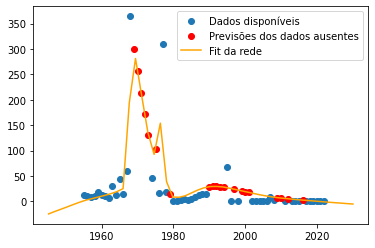

In [8]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

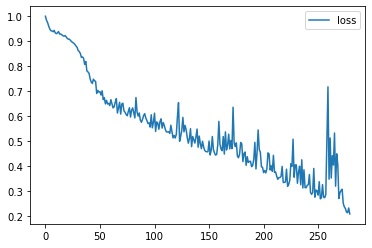

In [9]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [10]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Lagosta_art':prev_ausentes.flatten()})


df_previsoes.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/Interpolação Lagosta_art.xlsx')

df_previsoes

,Ano,Lagosta_art
0,1969,299.750183
1,1970,255.940964
2,1971,213.906036
3,1972,172.148346
4,1973,130.244736
5,1975,103.296844
6,1979,13.716334
7,1990,28.834682
8,1991,29.282488
9,1992,29.262125
